In [1]:
import pandas as pd

# Sample data
data = {
    'date': pd.to_datetime([
        '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
        '2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
        '2024-03-31', '2024-06-30', '2024-09-30', '2024-12-31'
    ]),
    'net_income': [100, 150, 200, 250, 120, 180, 230, 300, 110, 190, 250, 350]
}

df = pd.DataFrame(data)
# df.set_index('date', inplace=True)


In [2]:
# Extract year and quarter from the date
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter

# Set the multiindex
df.set_index(['year', 'quarter', 'date'], inplace=True)

In [3]:
# Compute LTM Net Income
df['LTM_net_income'] = df['net_income'].rolling(window=4).sum()
# Compute YoY Change in Value
df['YoY_change_value'] = df['net_income'] - df['net_income'].shift(4)
# Compute YoY Change in Percentage
df['YoY_change_percent'] = df['YoY_change_value'] / df['net_income'].shift(4)
# Compute the yearly sum of net income
df['yearly_sum'] = df.groupby(level='year')['net_income'].transform('sum')



In [4]:
# Final DataFrame
df = df[['net_income', 'LTM_net_income', 'YoY_change_value', 'YoY_change_percent', 'yearly_sum']]
print(df)


                         net_income  LTM_net_income  YoY_change_value  \
year quarter date                                                       
2022 1       2022-03-31         100             NaN               NaN   
     2       2022-06-30         150             NaN               NaN   
     3       2022-09-30         200             NaN               NaN   
     4       2022-12-31         250           700.0               NaN   
2023 1       2023-03-31         120           720.0              20.0   
     2       2023-06-30         180           750.0              30.0   
     3       2023-09-30         230           780.0              30.0   
     4       2023-12-31         300           830.0              50.0   
2024 1       2024-03-31         110           820.0             -10.0   
     2       2024-06-30         190           830.0              10.0   
     3       2024-09-30         250           850.0              20.0   
     4       2024-12-31         350           900.0

C:\Users\PWeigner\AppData\Local\Temp\ipykernel_29464\1487017495.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dates.strftime('%Y-%m-%d'))


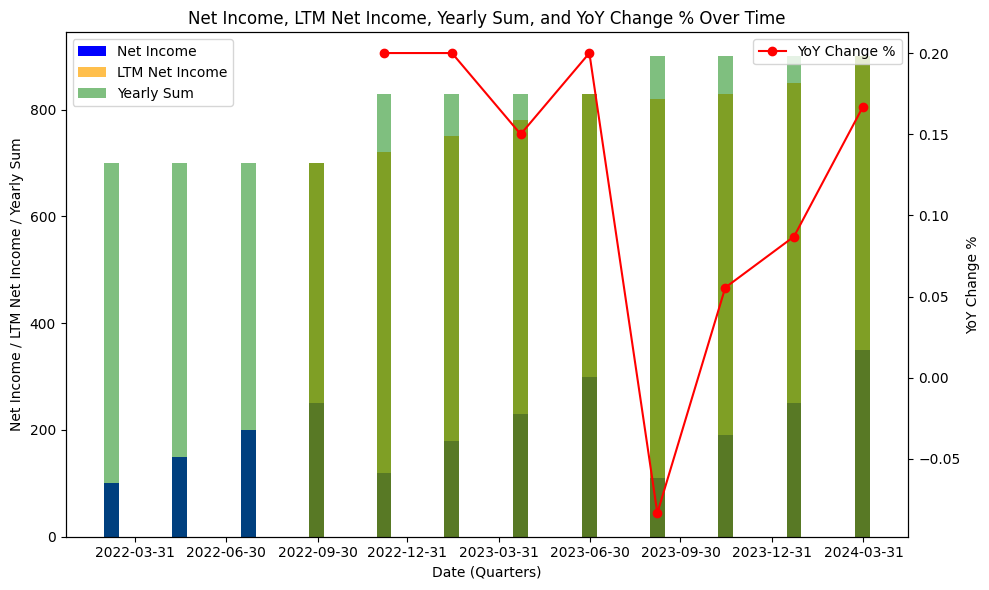

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# X-axis: Extract dates from the index
dates = df.index.get_level_values('date')

# Number of bars and width of each bar
bar_width = 20  # Adjust this value as needed
bar_positions = np.arange(len(dates))

# Plot each bar slightly offset
ax1.bar(dates, df['net_income'],align='center',  width=bar_width, color='blue', label='Net Income')
ax1.bar(dates, df['LTM_net_income'],align='center',  width=bar_width, color='orange', alpha=0.7, label='LTM Net Income')
ax1.bar(dates, df['yearly_sum'],align='center',  width=bar_width, color='green', alpha=0.5, label='Yearly Sum')

# Set x-ticks to the center of the group of bars
# ax1.set_xticks(bar_positions)
ax1.set_xticklabels(dates.strftime('%Y-%m-%d'))

# Labels and legend
ax1.set_xlabel('Date (Quarters)')
ax1.set_ylabel('Net Income / LTM Net Income / Yearly Sum')
ax1.legend(loc='upper left')

# Secondary Y-axis: YoY Change in Percentage as a line with points
ax2 = ax1.twinx()
ax2.plot(dates, df['YoY_change_percent'], color='red', marker='o', label='YoY Change %')
ax2.set_ylabel('YoY Change %')
ax2.legend(loc='upper right')

max = df['YoY_change_percent'].max()
min = df['YoY_change_percent'].min()
if (min > 0):
  min = 0
min = min - ((max+min)/len(ax2.get_yticks()))

ax2.set_ylim(min, max + ((max+min)/len(ax2.get_yticks())))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.title('Net Income, LTM Net Income, Yearly Sum, and YoY Change % Over Time')
plt.tight_layout()
plt.show()

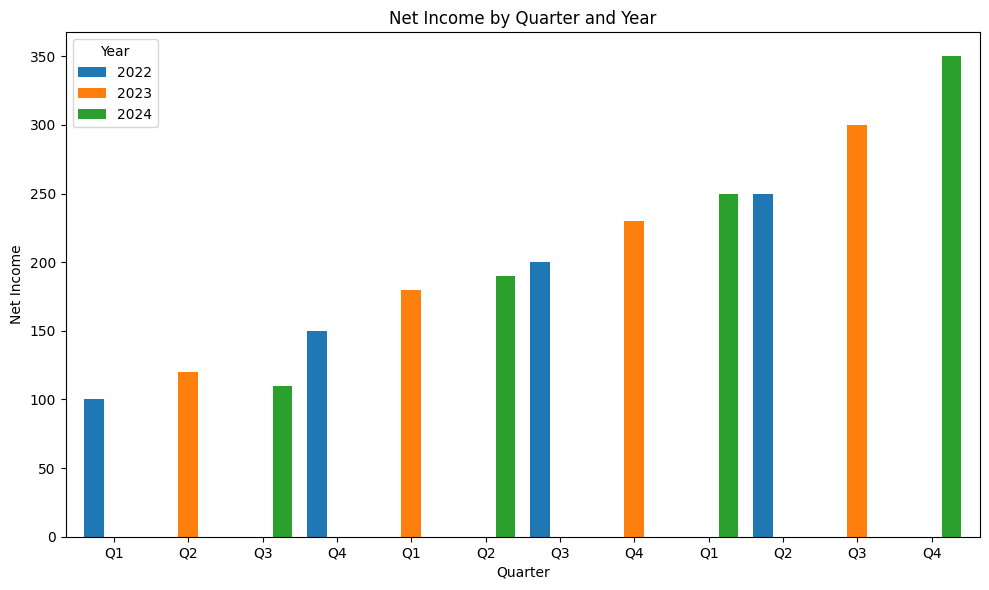

In [6]:
# Pivot data for plotting
df_pivot = df['net_income'].unstack(level=0)  # Unstack 'year' to get quarters as rows and years as columns

# Plotting
ax = df_pivot.plot(kind='bar', figsize=(10, 6), width=0.8)

# Set custom x-axis tick labels to only show Q1, Q2, Q3, Q4
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4']* (len(df_pivot.index) // 4))

# Set labels and title
plt.xlabel('Quarter')
plt.ylabel('Net Income')
plt.title('Net Income by Quarter and Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show plot
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
from calendar import month_name  # conveniently supplies a list of sorted month names or you can type them out manually
import numpy as np  # for test data

# test data and dataframe
np.random.seed(5*4)
rows = 5*4*3
data = {'date': pd.bdate_range('2021-01-01', freq='QE', periods=rows), 'value': np.random.randint(100, 1001, size=(rows))}
df = pd.DataFrame(data, index=data['date'])

# select data within specified quantiles
df = df[df.value.gt(df.value.quantile(0.025)) & df.value.lt(df.value.quantile(0.975))]

# display(df.head())
# df = pd.DataFrame(np.random.randn(4, 4), index=['Q1', 'Q2', 'Q3', 'Q4'], columns=['2019', '2020', '2021', '2022'])
df['quarters'] = pd.Categorical(df["date"].dt.quarter, categories=[1, 2, 3, 4], ordered=True)
df['years'] = pd.Categorical(df["date"].dt.year, categories=df["date"].dt.year.groupby(df["date"].dt.year).mean().astype(int), ordered=True)
df['quarters'] = pd.Categorical('Q' + df['quarters'].astype(str))
# df[:]

# pivot the dataframe into the correct shape
# dfp = pd.pivot_table(data=df, index=df.date.dt.year, columns='quarters', values='value', observed=True)
# dfp.head(8)

# plot
# ax = dfp.plot(kind='bar', figsize=(12, 4), ylabel='Mean Page Views', xlabel='Year', rot=0)
# _ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

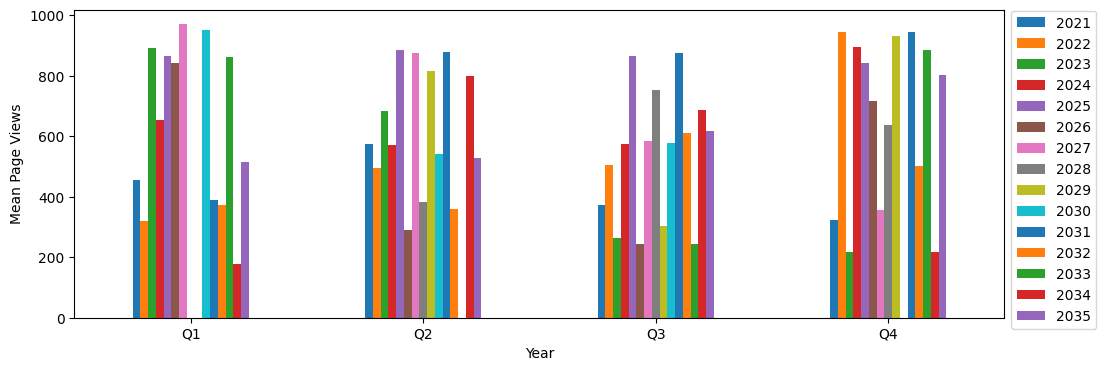

In [9]:
# pivot the dataframe into the correct shape
dfp = pd.pivot_table(data=df, index=df["quarters"], columns='years', values='value', observed=True)
# dfp.head(10)
# plot
ax = dfp.plot(kind='bar', figsize=(12, 4), ylabel='Mean Page Views', xlabel='Year', rot=0)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [36]:
# df["date"].dt.year.groupby(df["date"].dt.year).mean().astype(int)
# dfp.head(10)
# k = [month_name[int(l)] for l in list('234.,kjabcd')]

bddf = pd.bdate_range('2021-01-01', freq='QE', periods=10, tz='Europe/Prague', name='date', inclusive='right')
bddf[:]

DatetimeIndex(['2021-03-31 00:00:00+02:00', '2021-06-30 00:00:00+02:00',
               '2021-09-30 00:00:00+02:00', '2021-12-31 00:00:00+01:00',
               '2022-03-31 00:00:00+02:00', '2022-06-30 00:00:00+02:00',
               '2022-09-30 00:00:00+02:00', '2022-12-31 00:00:00+01:00',
               '2023-03-31 00:00:00+02:00', '2023-06-30 00:00:00+02:00'],
              dtype='datetime64[ns, Europe/Prague]', name='date', freq='QE-DEC')